In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
%matplotlib inline

In [14]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

#gpus = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpu, True)
#ограничивает используемую память

Num GPUs Available:  0


In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
num_pixels = X_train.shape[1] * X_train.shape[2]

In [18]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

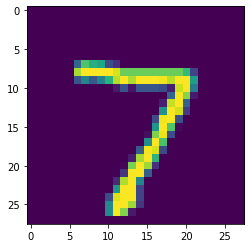

In [19]:
plt.imshow(X_test[0].reshape(28, 28)*255)

In [20]:
y_test[0]

7

In [21]:
# делаем категориальное представление
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [22]:
y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# Dense

In [23]:
X_train = np.reshape(X_train, (len(X_train), num_pixels))
X_test = np.reshape(X_test, (len(X_test), num_pixels))

In [24]:
X_test.shape

(10000, 784)

In [25]:
input_img = Input((num_pixels, ))
end = Dense(num_classes, activation='softmax')(input_img)

model = Model(input_img, end)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.predict(X_test)[0]

313/313 [==============================] - 0s 776us/step


array([0.06158048, 0.0995828 , 0.08109348, 0.18293151, 0.04704972,
       0.06155657, 0.16873954, 0.12953572, 0.05930082, 0.10862941],
      dtype=float32)

In [28]:
#fit - функция обучения
#epoch - кол-во шагов, за которые мы обходим всю модель
#batch_size - кол-во чисел, которые одновременно обрабатываются за шаг
#нужно, чтобы первая картинка не влияла на всю модель
history = model.fit(X_train,
                      y_train,
                      epochs=50,
                      batch_size=1024,
                      shuffle=True,
                      validation_data=(X_test, y_test),
                      verbose=1)

Epoch 1/50
59/59 [==============================] - 1s 5ms/step - loss: 1.4621 - accuracy: 0.6150 - val_loss: 0.8931 - val_accuracy: 0.8178
Epoch 2/50
59/59 [==============================] - 0s 5ms/step - loss: 0.7529 - accuracy: 0.8324 - val_loss: 0.6075 - val_accuracy: 0.8607
Epoch 3/50
59/59 [==============================] - 0s 5ms/step - loss: 0.5732 - accuracy: 0.8637 - val_loss: 0.4986 - val_accuracy: 0.8822
Epoch 4/50
59/59 [==============================] - 0s 4ms/step - loss: 0.4910 - accuracy: 0.8784 - val_loss: 0.4406 - val_accuracy: 0.8911
Epoch 5/50
59/59 [==============================] - 0s 4ms/step - loss: 0.4426 - accuracy: 0.8870 - val_loss: 0.4042 - val_accuracy: 0.8976
Epoch 6/50
59/59 [==============================] - 0s 4ms/step - loss: 0.4107 - accuracy: 0.8934 - val_loss: 0.3794 - val_accuracy: 0.9025
Epoch 7/50
59/59 [==============================] - 0s 4ms/step - loss: 0.3877 - accuracy: 0.8984 - val_loss: 0.3611 - val_accuracy: 0.9043
Epoch 8/50
59/59 [==

In [31]:
model.predict(X_test)[0]

313/313 [==============================] - 0s 767us/step


array([1.1015799e-05, 6.6035905e-10, 3.0501575e-05, 6.2603559e-03,
       5.4229724e-07, 3.0094287e-05, 5.1230682e-09, 9.9322480e-01,
       2.5258158e-05, 4.1739744e-04], dtype=float32)

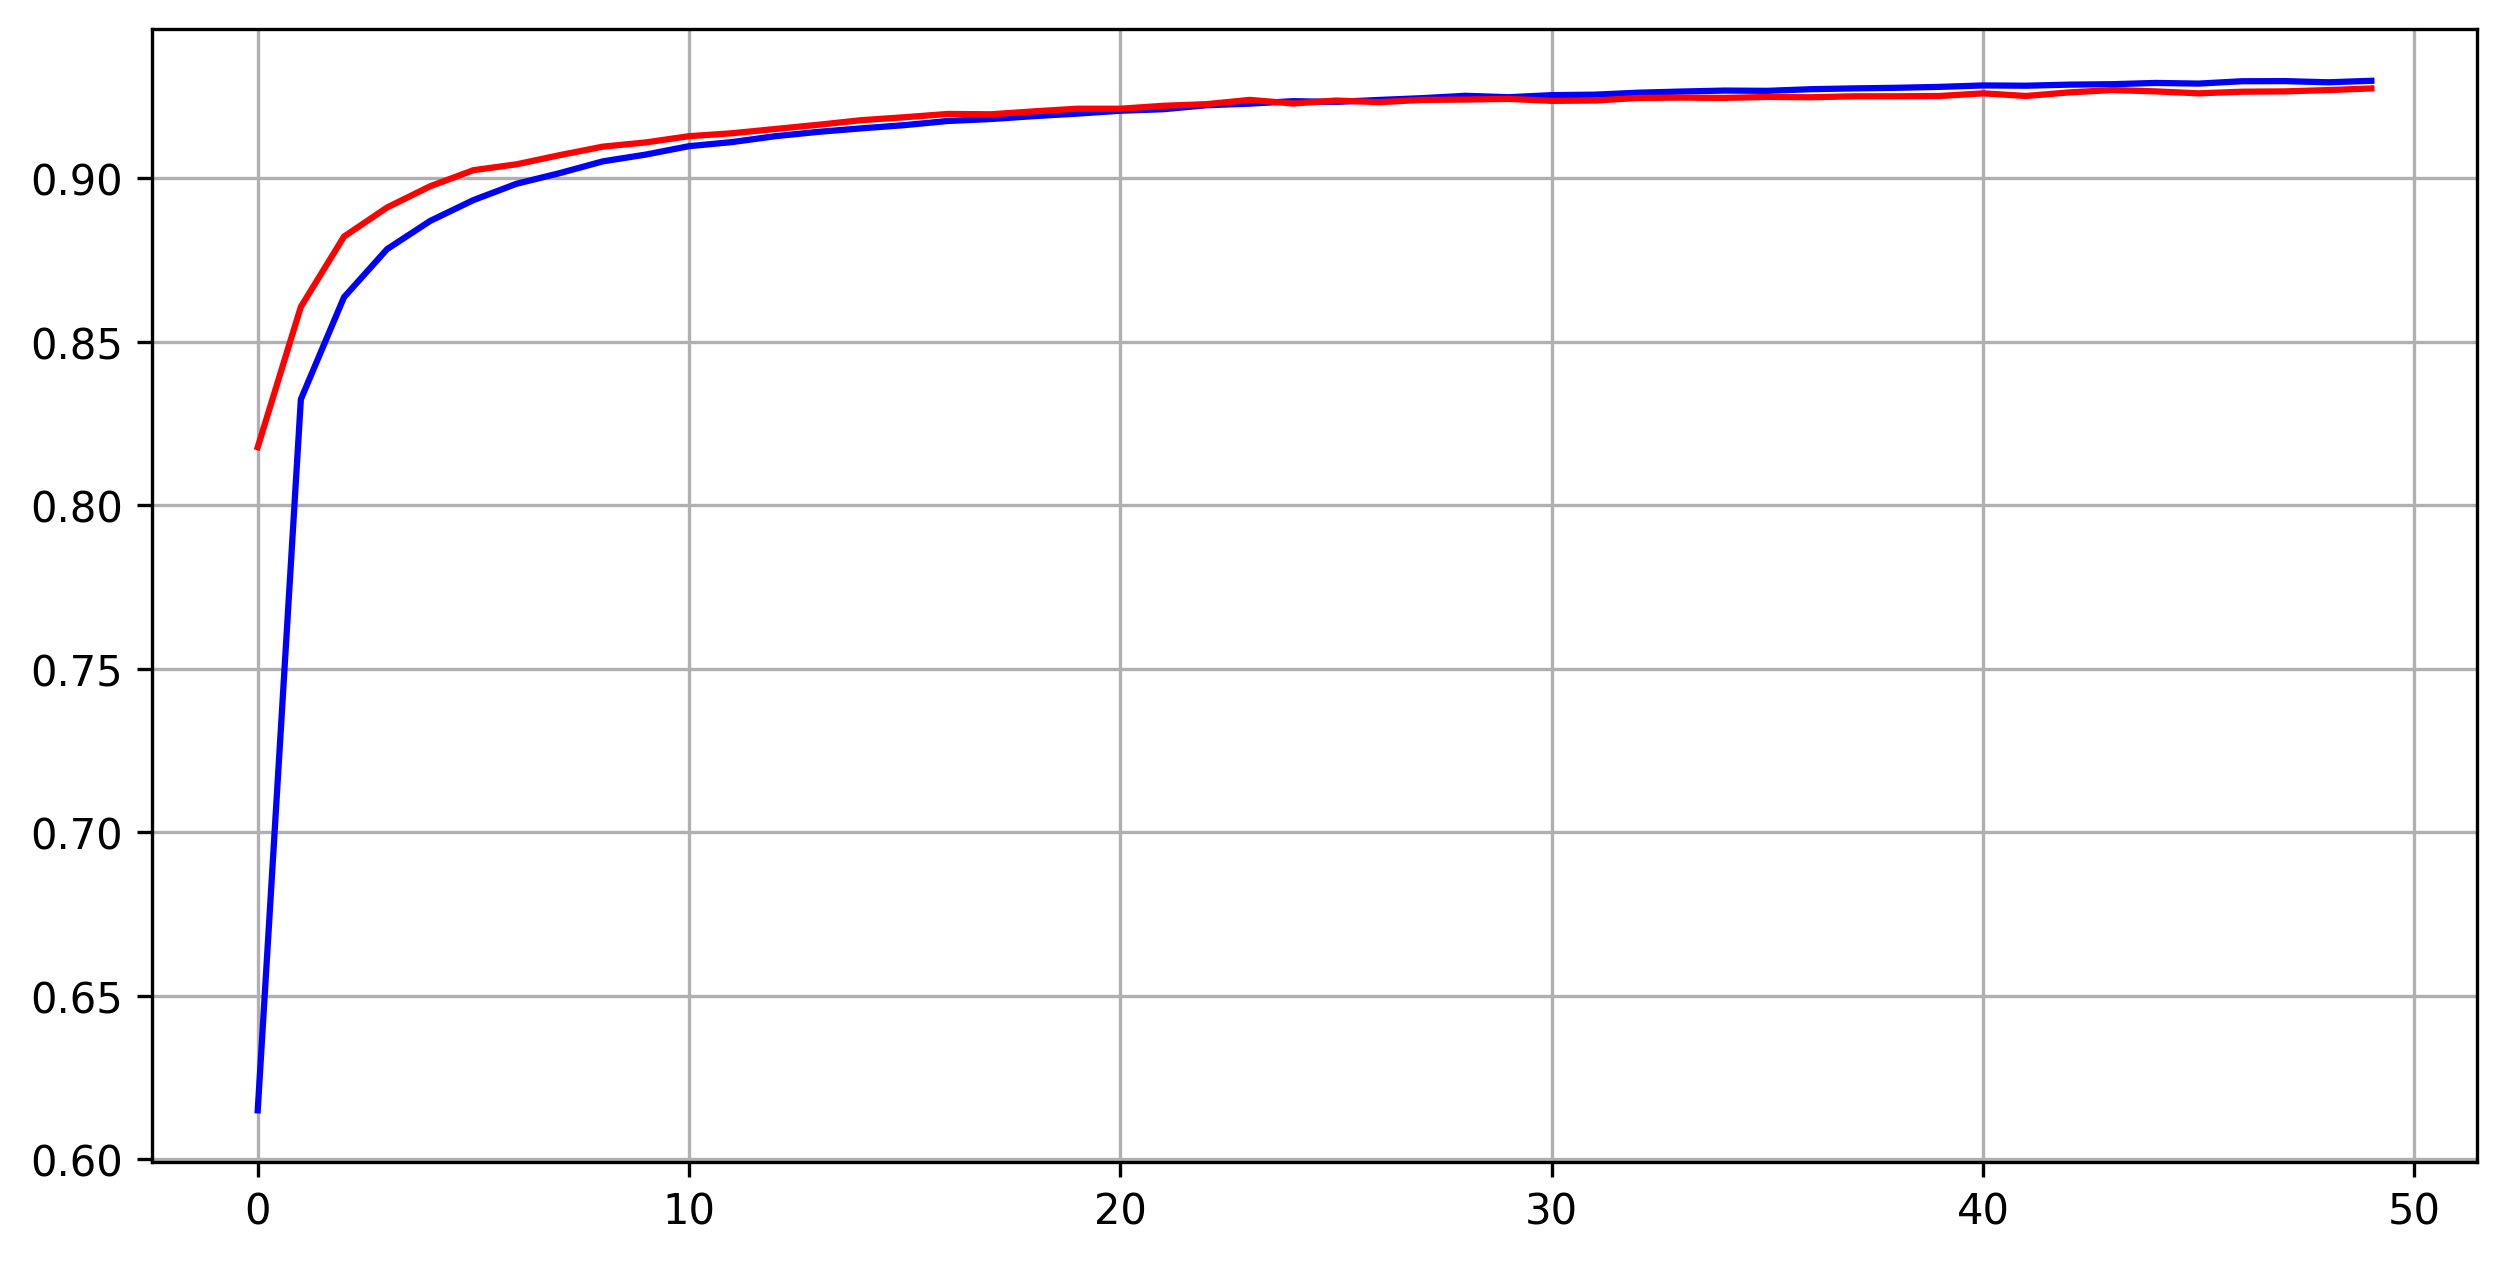

In [32]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(history.history['accuracy'], 'b')
plt.plot(history.history['val_accuracy'], 'r')
plt.grid()

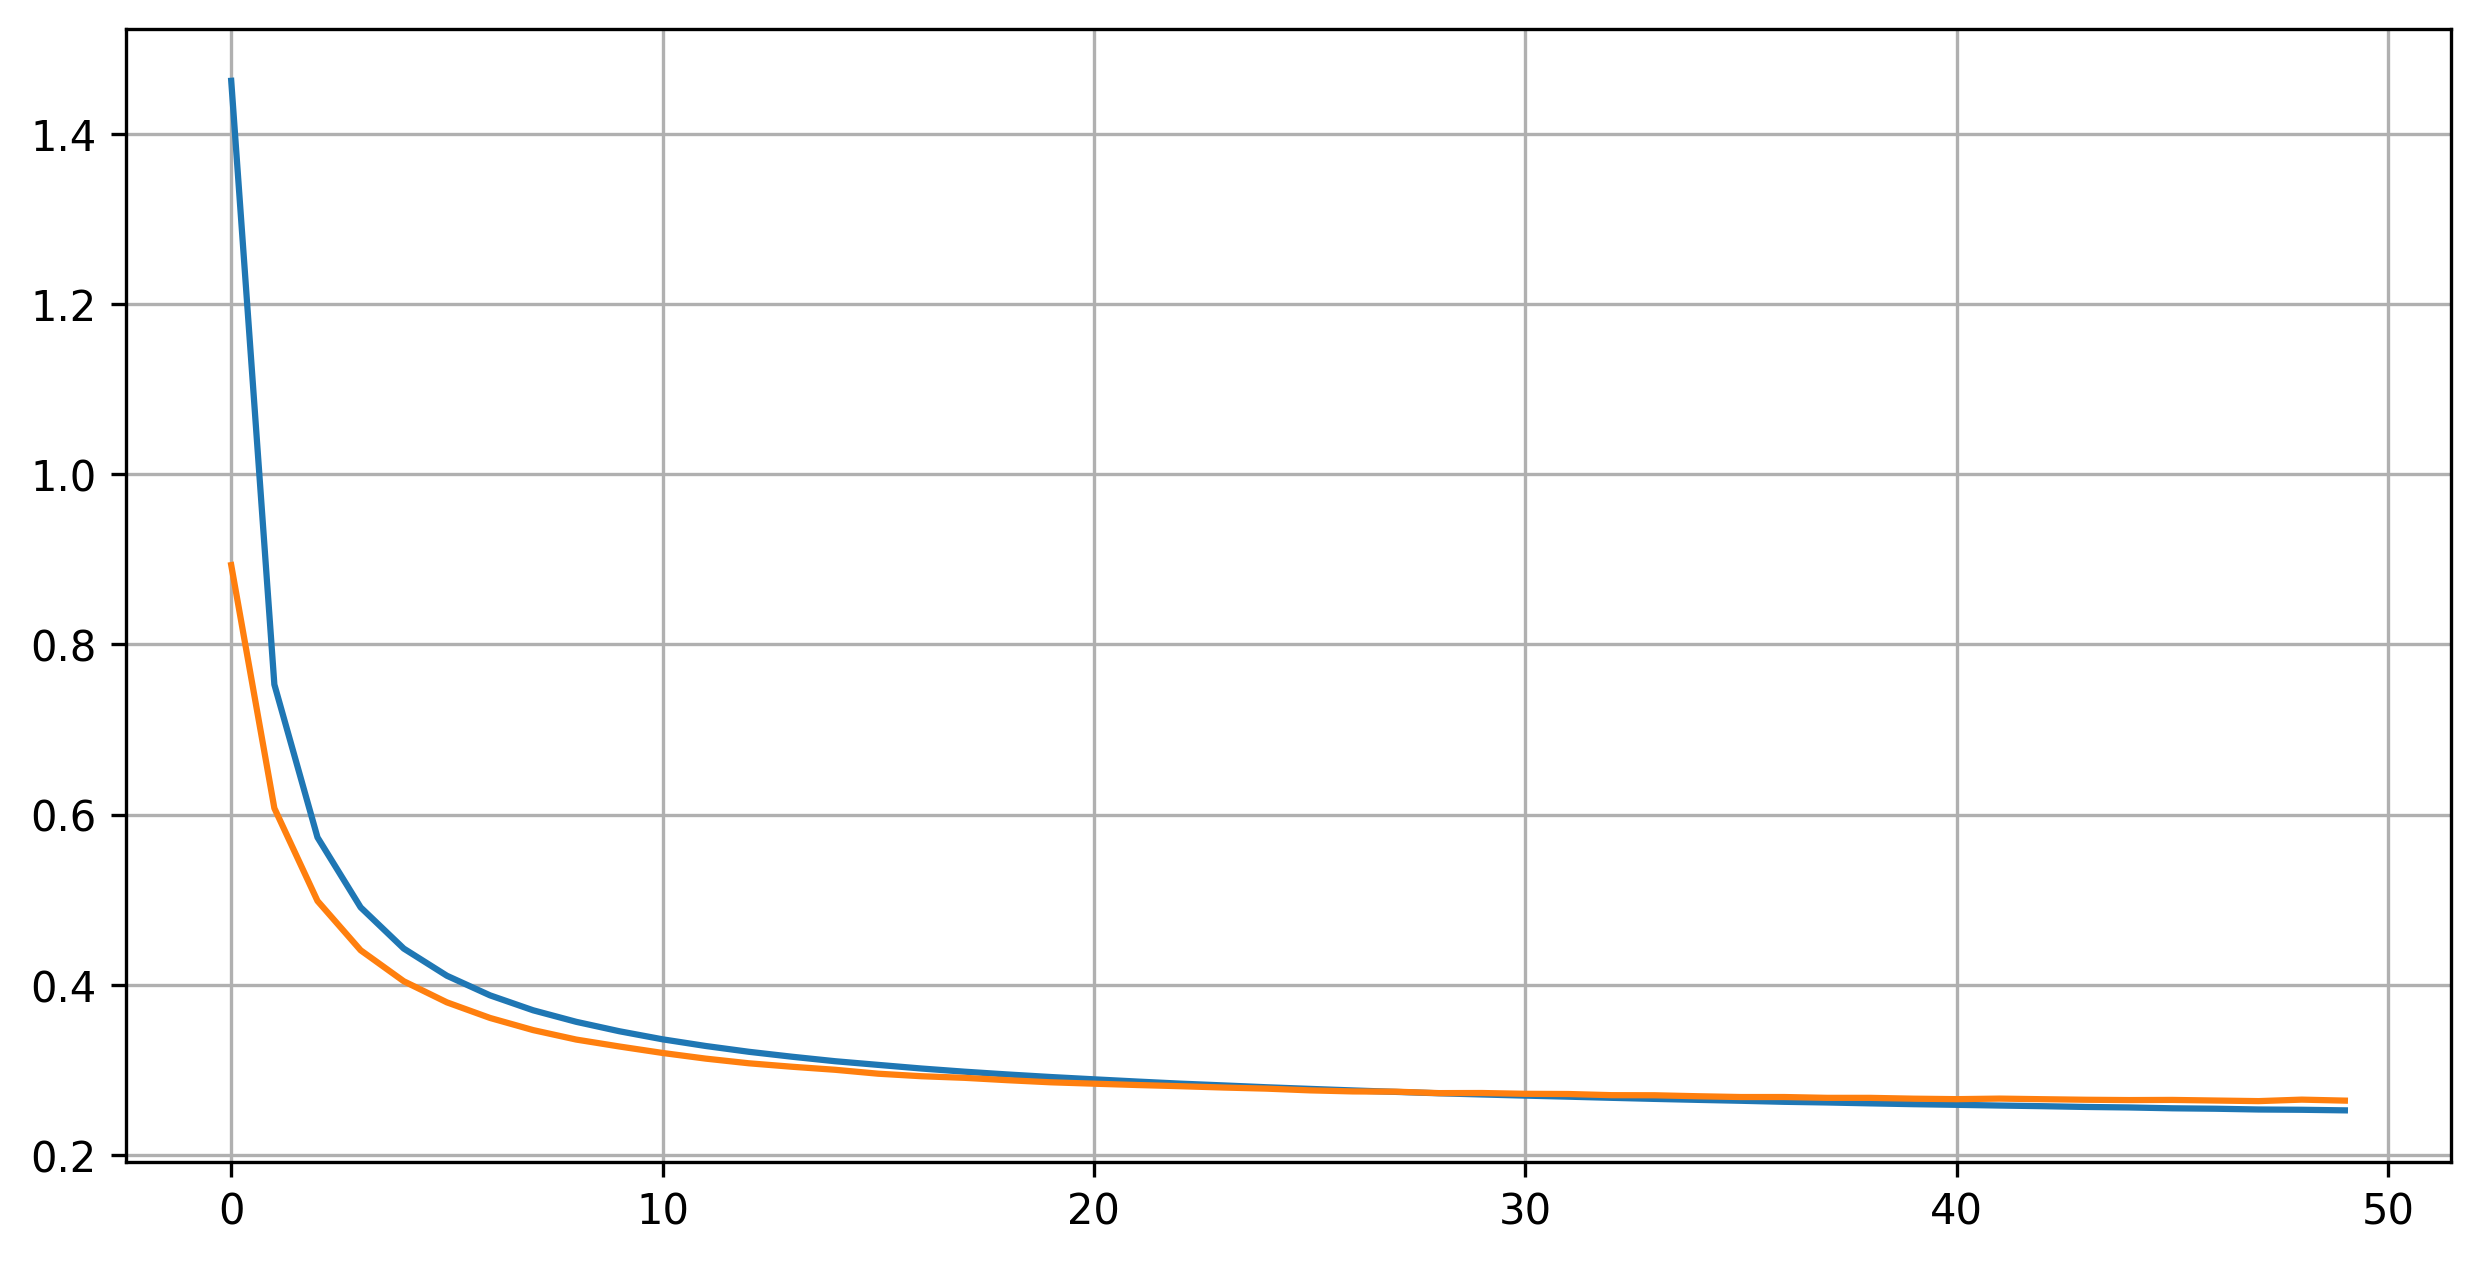

In [33]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()

In [34]:
input_img = Input((num_pixels, ))
x = Dense(100, activation='relu')(input_img)
end = Dense(num_classes, activation='softmax')(x)

model = Model(input_img, end)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
history = model.fit(X_train,
          y_train,
          epochs=50,
          batch_size=1024,
          shuffle=True,
          validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/50
59/59 [==============================] - 1s 7ms/step - loss: 0.8638 - accuracy: 0.7759 - val_loss: 0.3755 - val_accuracy: 0.9028
Epoch 2/50
59/59 [==============================] - 0s 6ms/step - loss: 0.3344 - accuracy: 0.9088 - val_loss: 0.2818 - val_accuracy: 0.9243
Epoch 3/50
59/59 [==============================] - 0s 6ms/step - loss: 0.2683 - accuracy: 0.9259 - val_loss: 0.2401 - val_accuracy: 0.9336
Epoch 4/50
59/59 [==============================] - 0s 5ms/step - loss: 0.2306 - accuracy: 0.9357 - val_loss: 0.2134 - val_accuracy: 0.9405
Epoch 5/50
59/59 [==============================] - 0s 6ms/step - loss: 0.2027 - accuracy: 0.9429 - val_loss: 0.1921 - val_accuracy: 0.9456
Epoch 6/50
59/59 [==============================] - 0s 6ms/step - loss: 0.1813 - accuracy: 0.9494 - val_loss: 0.1780 - val_accuracy: 0.9496
Epoch 7/50
59/59 [==============================] - 0s 5ms/step - loss: 0.1643 - accuracy: 0.9541 - val_loss: 0.1632 - val_accuracy: 0.9531
Epoch 8/50
59/59 [==

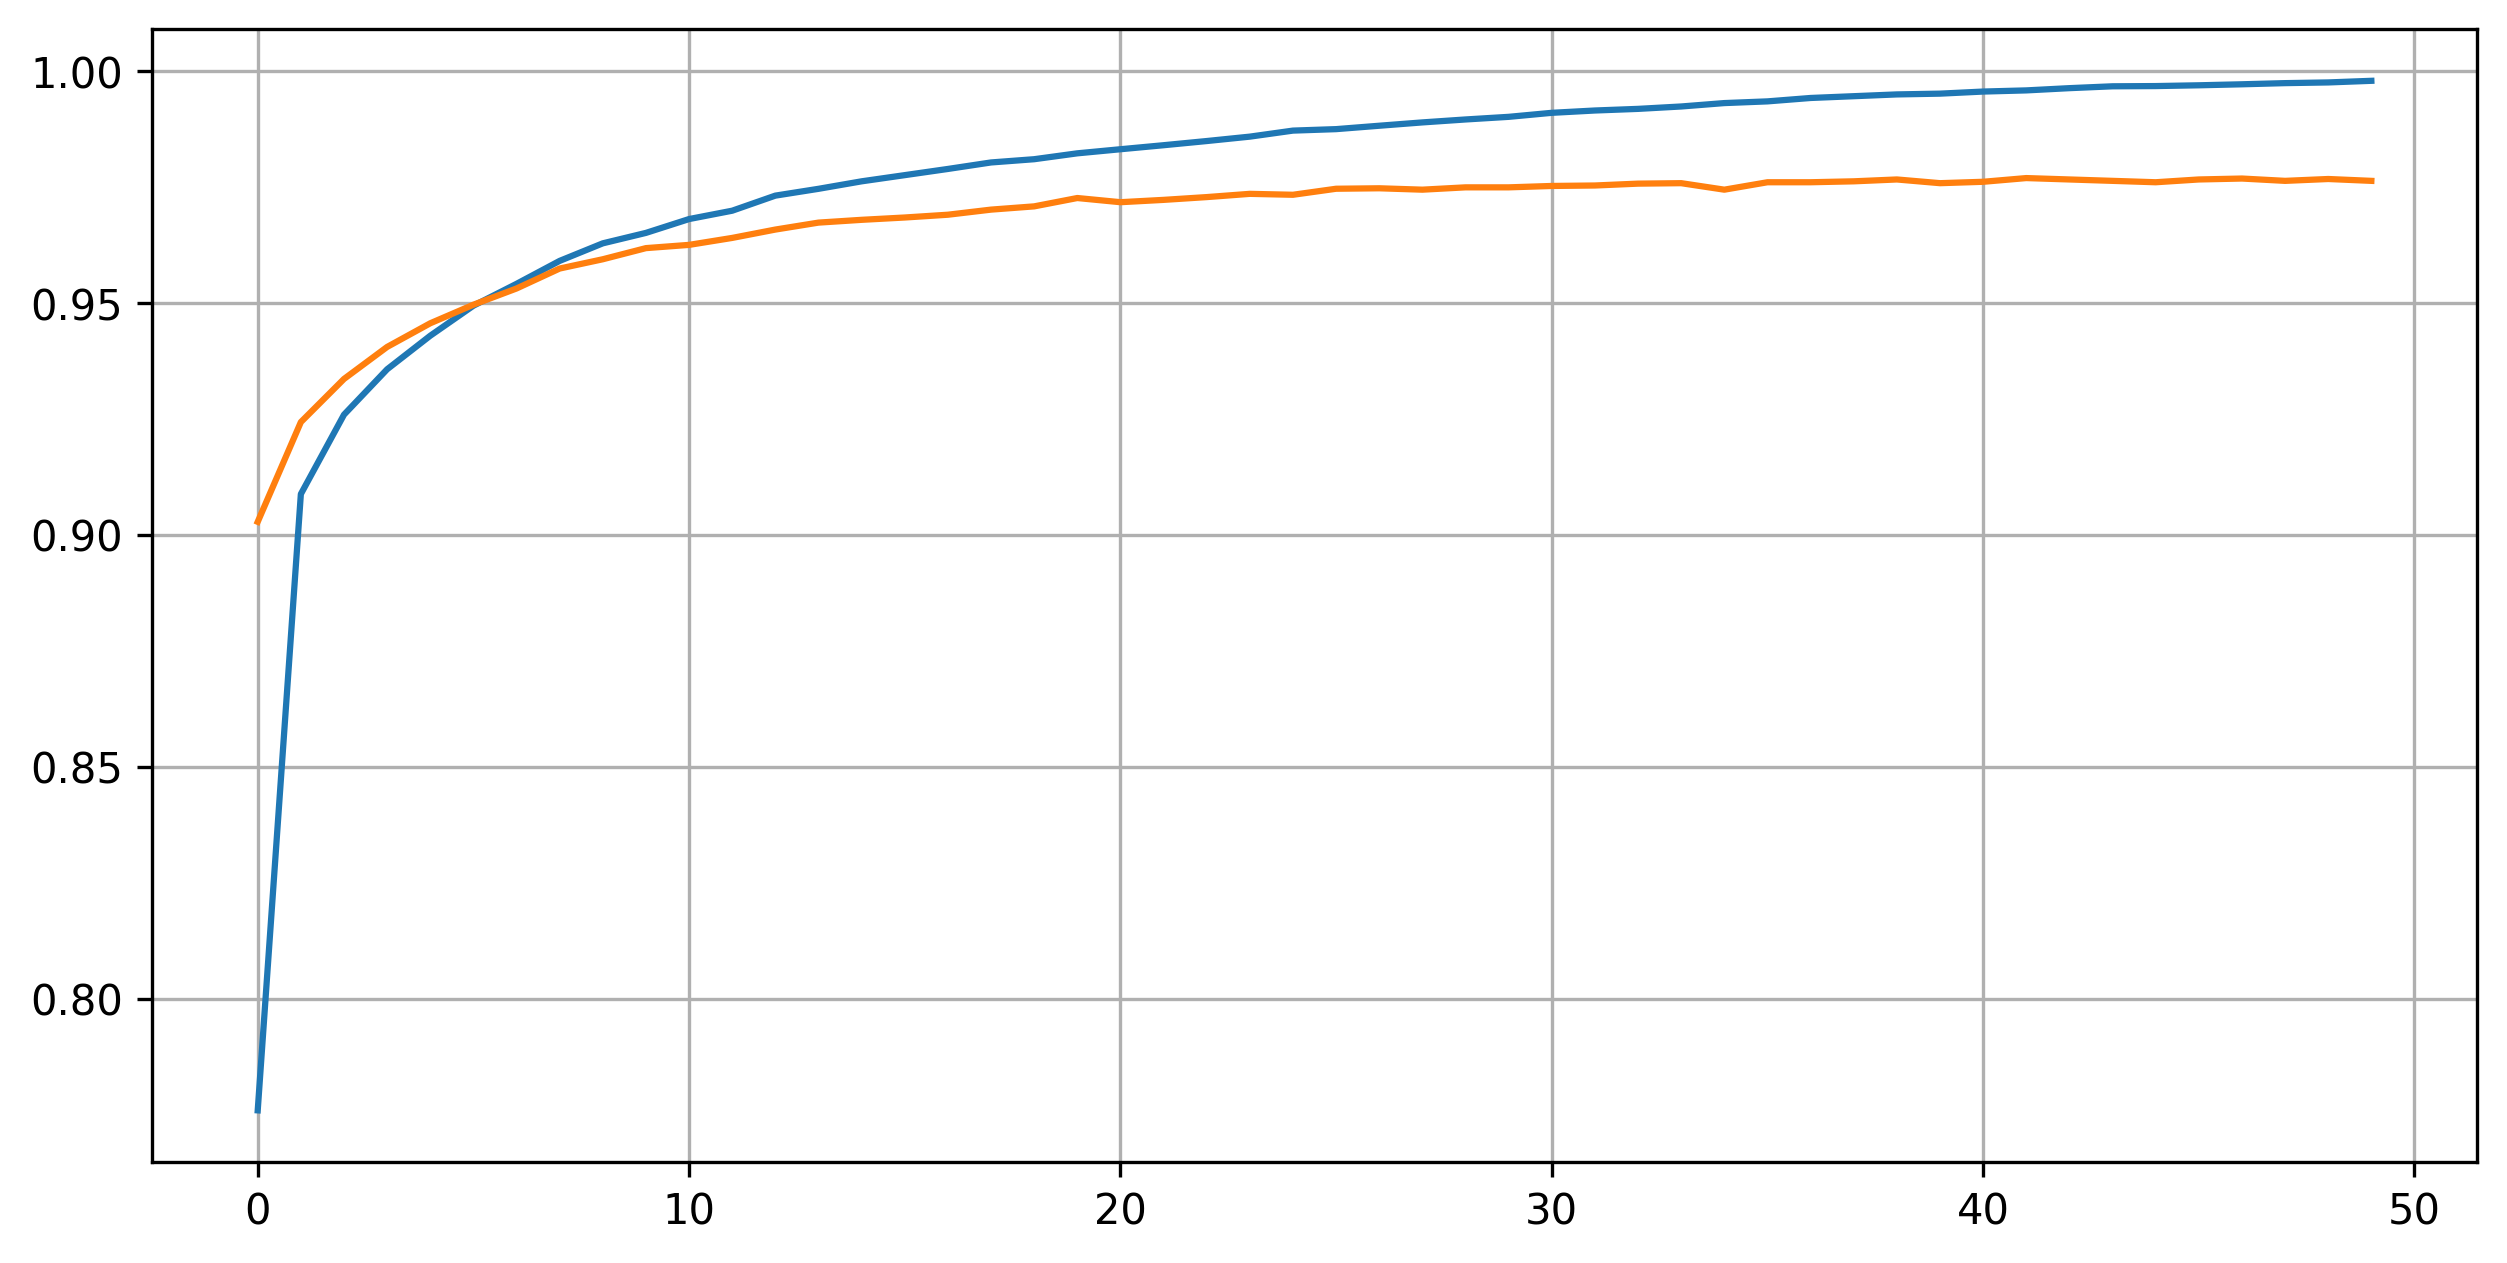

In [36]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()

In [41]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 700)               549500    
                                                                 
 dense_9 (Dense)             (None, 100)               70100     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 620,610
Trainable params: 620,610
Non-trainable params: 0
_________________________________________________________________


In [44]:
#overeducated model

input_img = Input((num_pixels, ))
x = Dense(700, activation='relu')(input_img)
x = Dense(100, activation='relu')(x)
end = Dense(num_classes, activation='softmax')(x)

model = Model(input_img, end)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,
          y_train,
          epochs=50,
          batch_size=1024,
          shuffle=True,
          validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/50
59/59 [==============================] - 1s 18ms/step - loss: 0.4784 - accuracy: 0.8687 - val_loss: 0.2080 - val_accuracy: 0.9408
Epoch 2/50
59/59 [==============================] - 1s 17ms/step - loss: 0.1664 - accuracy: 0.9522 - val_loss: 0.1365 - val_accuracy: 0.9590
Epoch 3/50
59/59 [==============================] - 1s 21ms/step - loss: 0.1145 - accuracy: 0.9671 - val_loss: 0.1085 - val_accuracy: 0.9679
Epoch 4/50
59/59 [==============================] - 1s 21ms/step - loss: 0.0847 - accuracy: 0.9757 - val_loss: 0.0931 - val_accuracy: 0.9723
Epoch 5/50
59/59 [==============================] - 1s 17ms/step - loss: 0.0649 - accuracy: 0.9810 - val_loss: 0.0818 - val_accuracy: 0.9764
Epoch 6/50
59/59 [==============================] - 1s 17ms/step - loss: 0.0509 - accuracy: 0.9853 - val_loss: 0.0764 - val_accuracy: 0.9769
Epoch 7/50
59/59 [==============================] - 1s 17ms/step - loss: 0.0404 - accuracy: 0.9888 - val_loss: 0.0724 - val_accuracy: 0.9782
Epoch 8/50
59

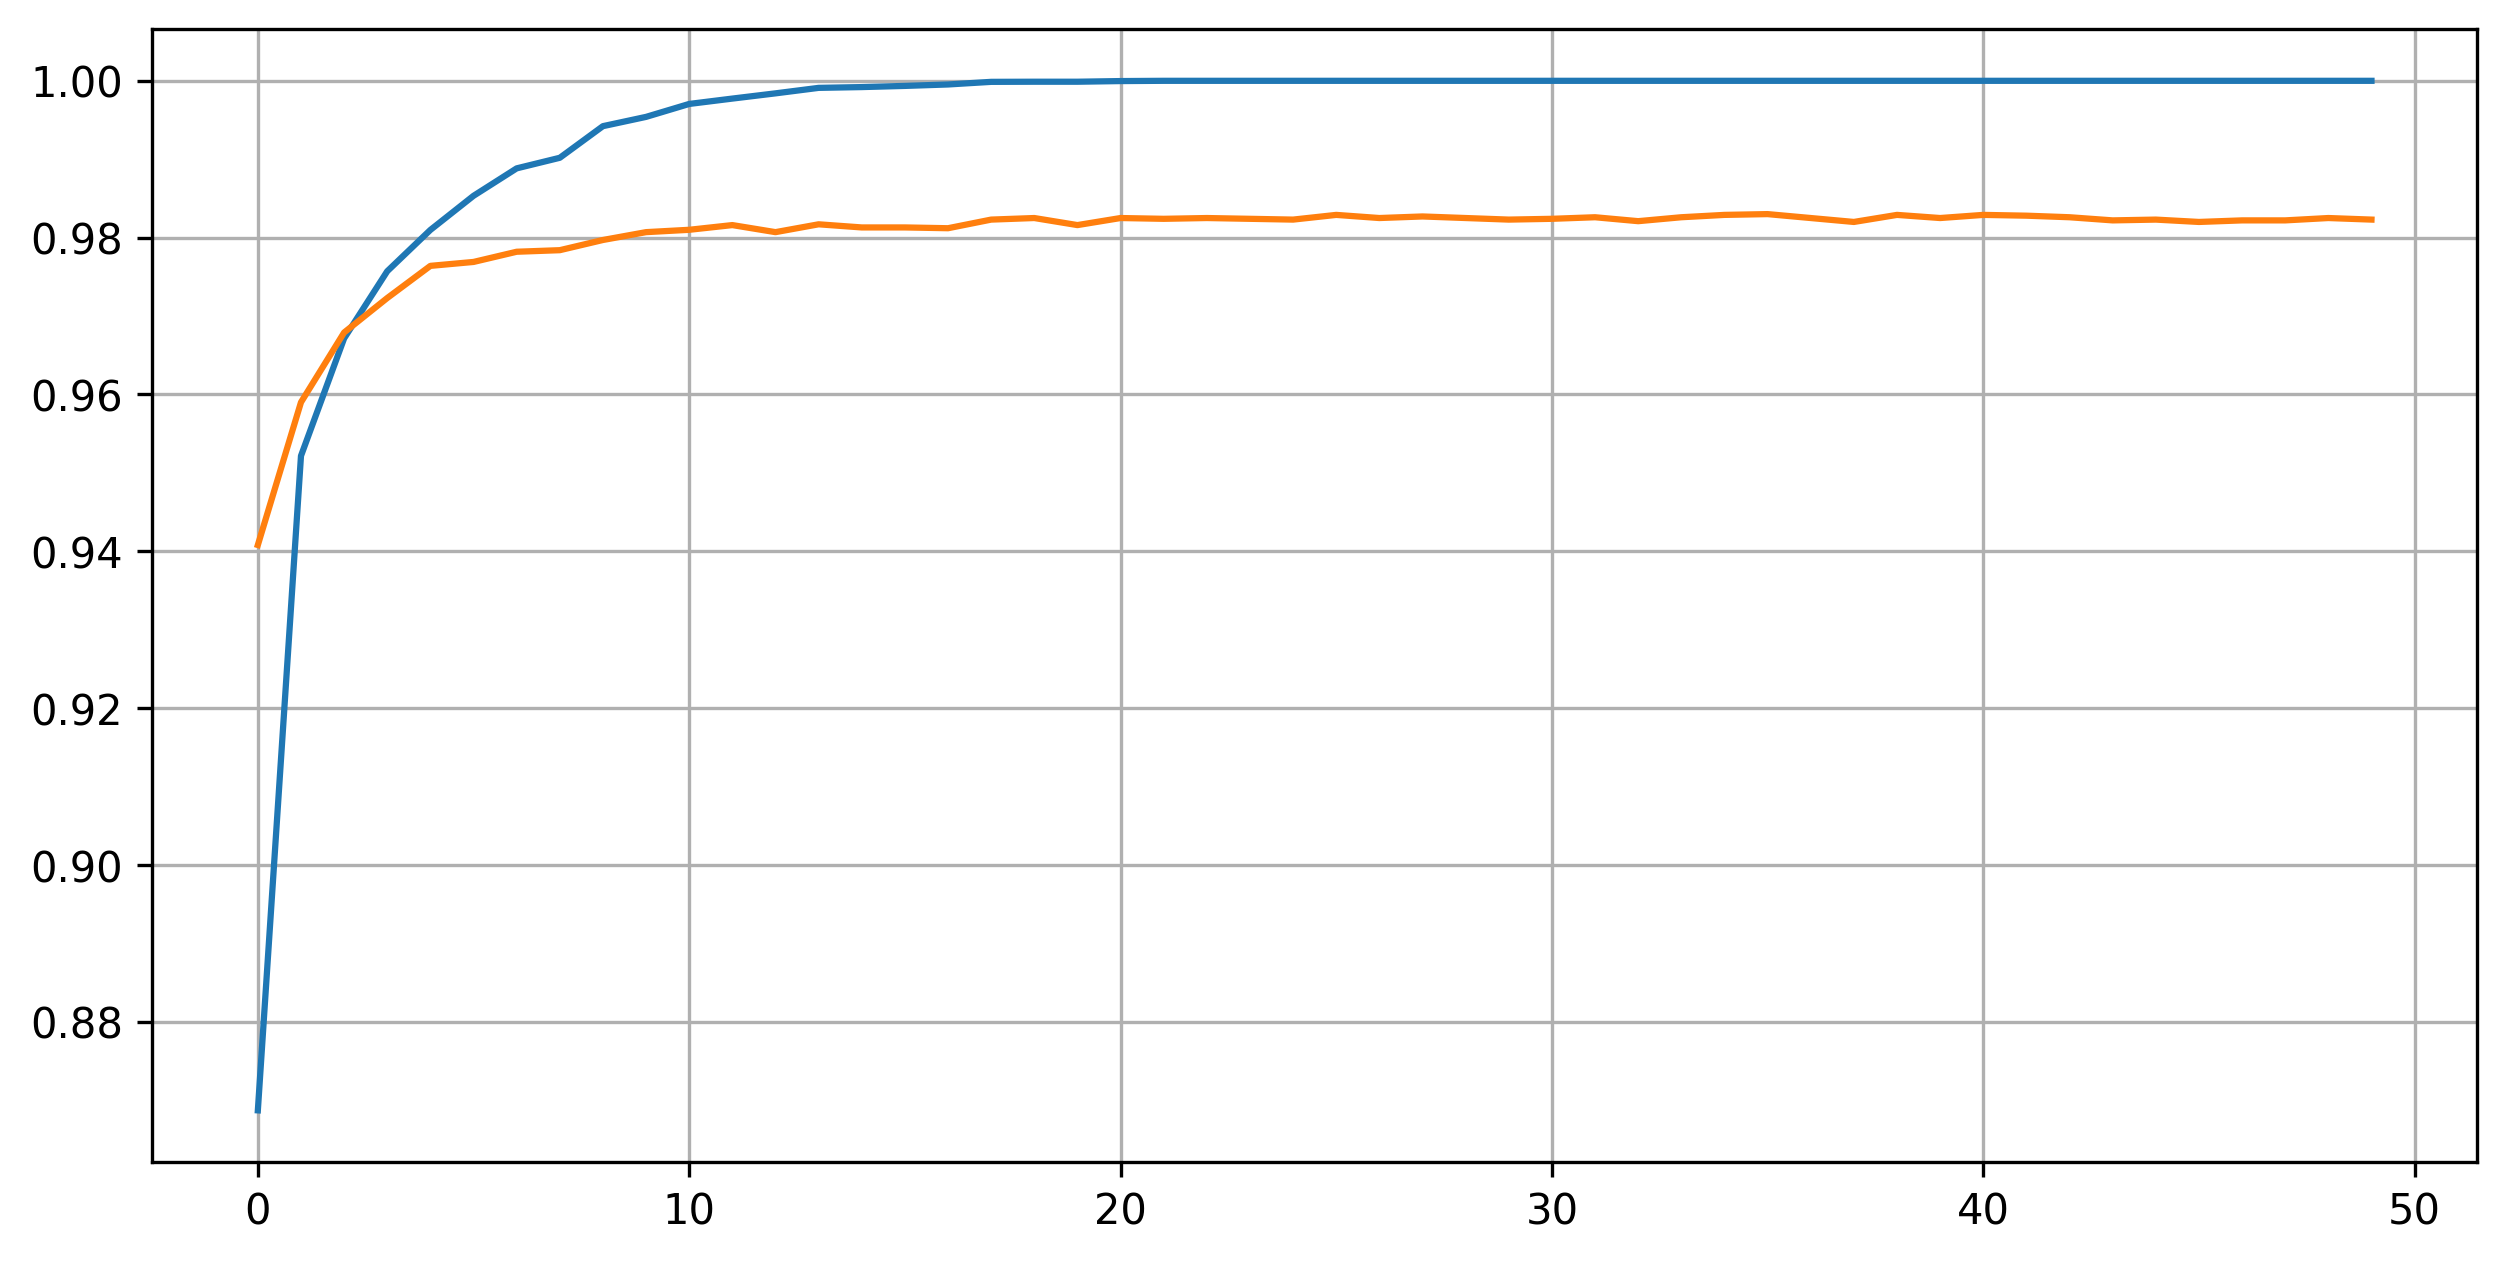

In [45]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()

# Final model with dropout

In [120]:
# model with dropout

input_img = Input((num_pixels, ))
x = Dense(1000, activation='relu')(input_img)
x = Dropout(0.7)(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.4)(x)
end = Dense(num_classes, activation='softmax')(x)

model = Model(input_img, end)

In [121]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,
          y_train,
          epochs=70,
          batch_size=1024,
          shuffle=True,
          validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/70
59/59 [==============================] - 2s 28ms/step - loss: 1.0727 - accuracy: 0.6420 - val_loss: 0.2855 - val_accuracy: 0.9183
Epoch 2/70
59/59 [==============================] - 2s 26ms/step - loss: 0.3961 - accuracy: 0.8842 - val_loss: 0.1840 - val_accuracy: 0.9466
Epoch 3/70
59/59 [==============================] - 2s 27ms/step - loss: 0.2867 - accuracy: 0.9189 - val_loss: 0.1483 - val_accuracy: 0.9551
Epoch 4/70
59/59 [==============================] - 2s 27ms/step - loss: 0.2385 - accuracy: 0.9332 - val_loss: 0.1215 - val_accuracy: 0.9653
Epoch 5/70
59/59 [==============================] - 2s 27ms/step - loss: 0.2073 - accuracy: 0.9413 - val_loss: 0.1087 - val_accuracy: 0.9667
Epoch 6/70
59/59 [==============================] - 2s 27ms/step - loss: 0.1875 - accuracy: 0.9495 - val_loss: 0.0992 - val_accuracy: 0.9707
Epoch 7/70
59/59 [==============================] - 2s 27ms/step - loss: 0.1684 - accuracy: 0.9540 - val_loss: 0.0947 - val_accuracy: 0.9712
Epoch 8/70
59

Epoch 59/70
59/59 [==============================] - 1s 24ms/step - loss: 0.0384 - accuracy: 0.9883 - val_loss: 0.0610 - val_accuracy: 0.9858
Epoch 60/70
59/59 [==============================] - 1s 24ms/step - loss: 0.0397 - accuracy: 0.9880 - val_loss: 0.0615 - val_accuracy: 0.9853
Epoch 61/70
59/59 [==============================] - 1s 25ms/step - loss: 0.0388 - accuracy: 0.9885 - val_loss: 0.0602 - val_accuracy: 0.9867
Epoch 62/70
59/59 [==============================] - 1s 25ms/step - loss: 0.0401 - accuracy: 0.9881 - val_loss: 0.0584 - val_accuracy: 0.9848
Epoch 63/70
59/59 [==============================] - 1s 24ms/step - loss: 0.0372 - accuracy: 0.9891 - val_loss: 0.0596 - val_accuracy: 0.9858
Epoch 64/70
59/59 [==============================] - 1s 25ms/step - loss: 0.0373 - accuracy: 0.9890 - val_loss: 0.0619 - val_accuracy: 0.9855
Epoch 65/70
59/59 [==============================] - 1s 24ms/step - loss: 0.0373 - accuracy: 0.9887 - val_loss: 0.0613 - val_accuracy: 0.9853
Epoch 

In [96]:
optimiser = tf.keras.optimizers.Adam()
loss = tf.keras.losses.CategoricalCrossentropy()

In [97]:
@tf.function
def train_batch(X, y):
    with tf.GradientTape() as tape:
        pred = model(X)
        Loss = loss(y, pred)
    grad = tape.gradient(Loss, model.trainable_variables)
    optimiser.apply_gradients(zip(grad, model.trainable_variables))
    return Loss

train_batch(batchX, batchY)

%%timeit 
train_batch(batchX, batchY)

NameError: name 'batchX' is not defined

In [98]:
def generator(X, y, batchsize=1024):
    idx = np.random.permutation(len(X))
    batchX = []
    batchY = []
    while True:
        for i in idx:
            batchX.append(X[i])
            batchY.append(y[i])
            if len(batchX) >= batchsize:
                yield np.array(batchX), np.array(batchY)
                batchX = []
                batchY = []
        idx = np.random.permutation(len(X))

In [99]:
gen = generator(X_train, y_train)

In [100]:
epochs = 10
steps_per_epoch = 60
Loss_hist = []
for i in range(epochs):
    for j in range(steps_per_epoch):
        batchX, batchY = next(gen)
        Loss_hist.append(train_batch(batchX, batchY).numpy())

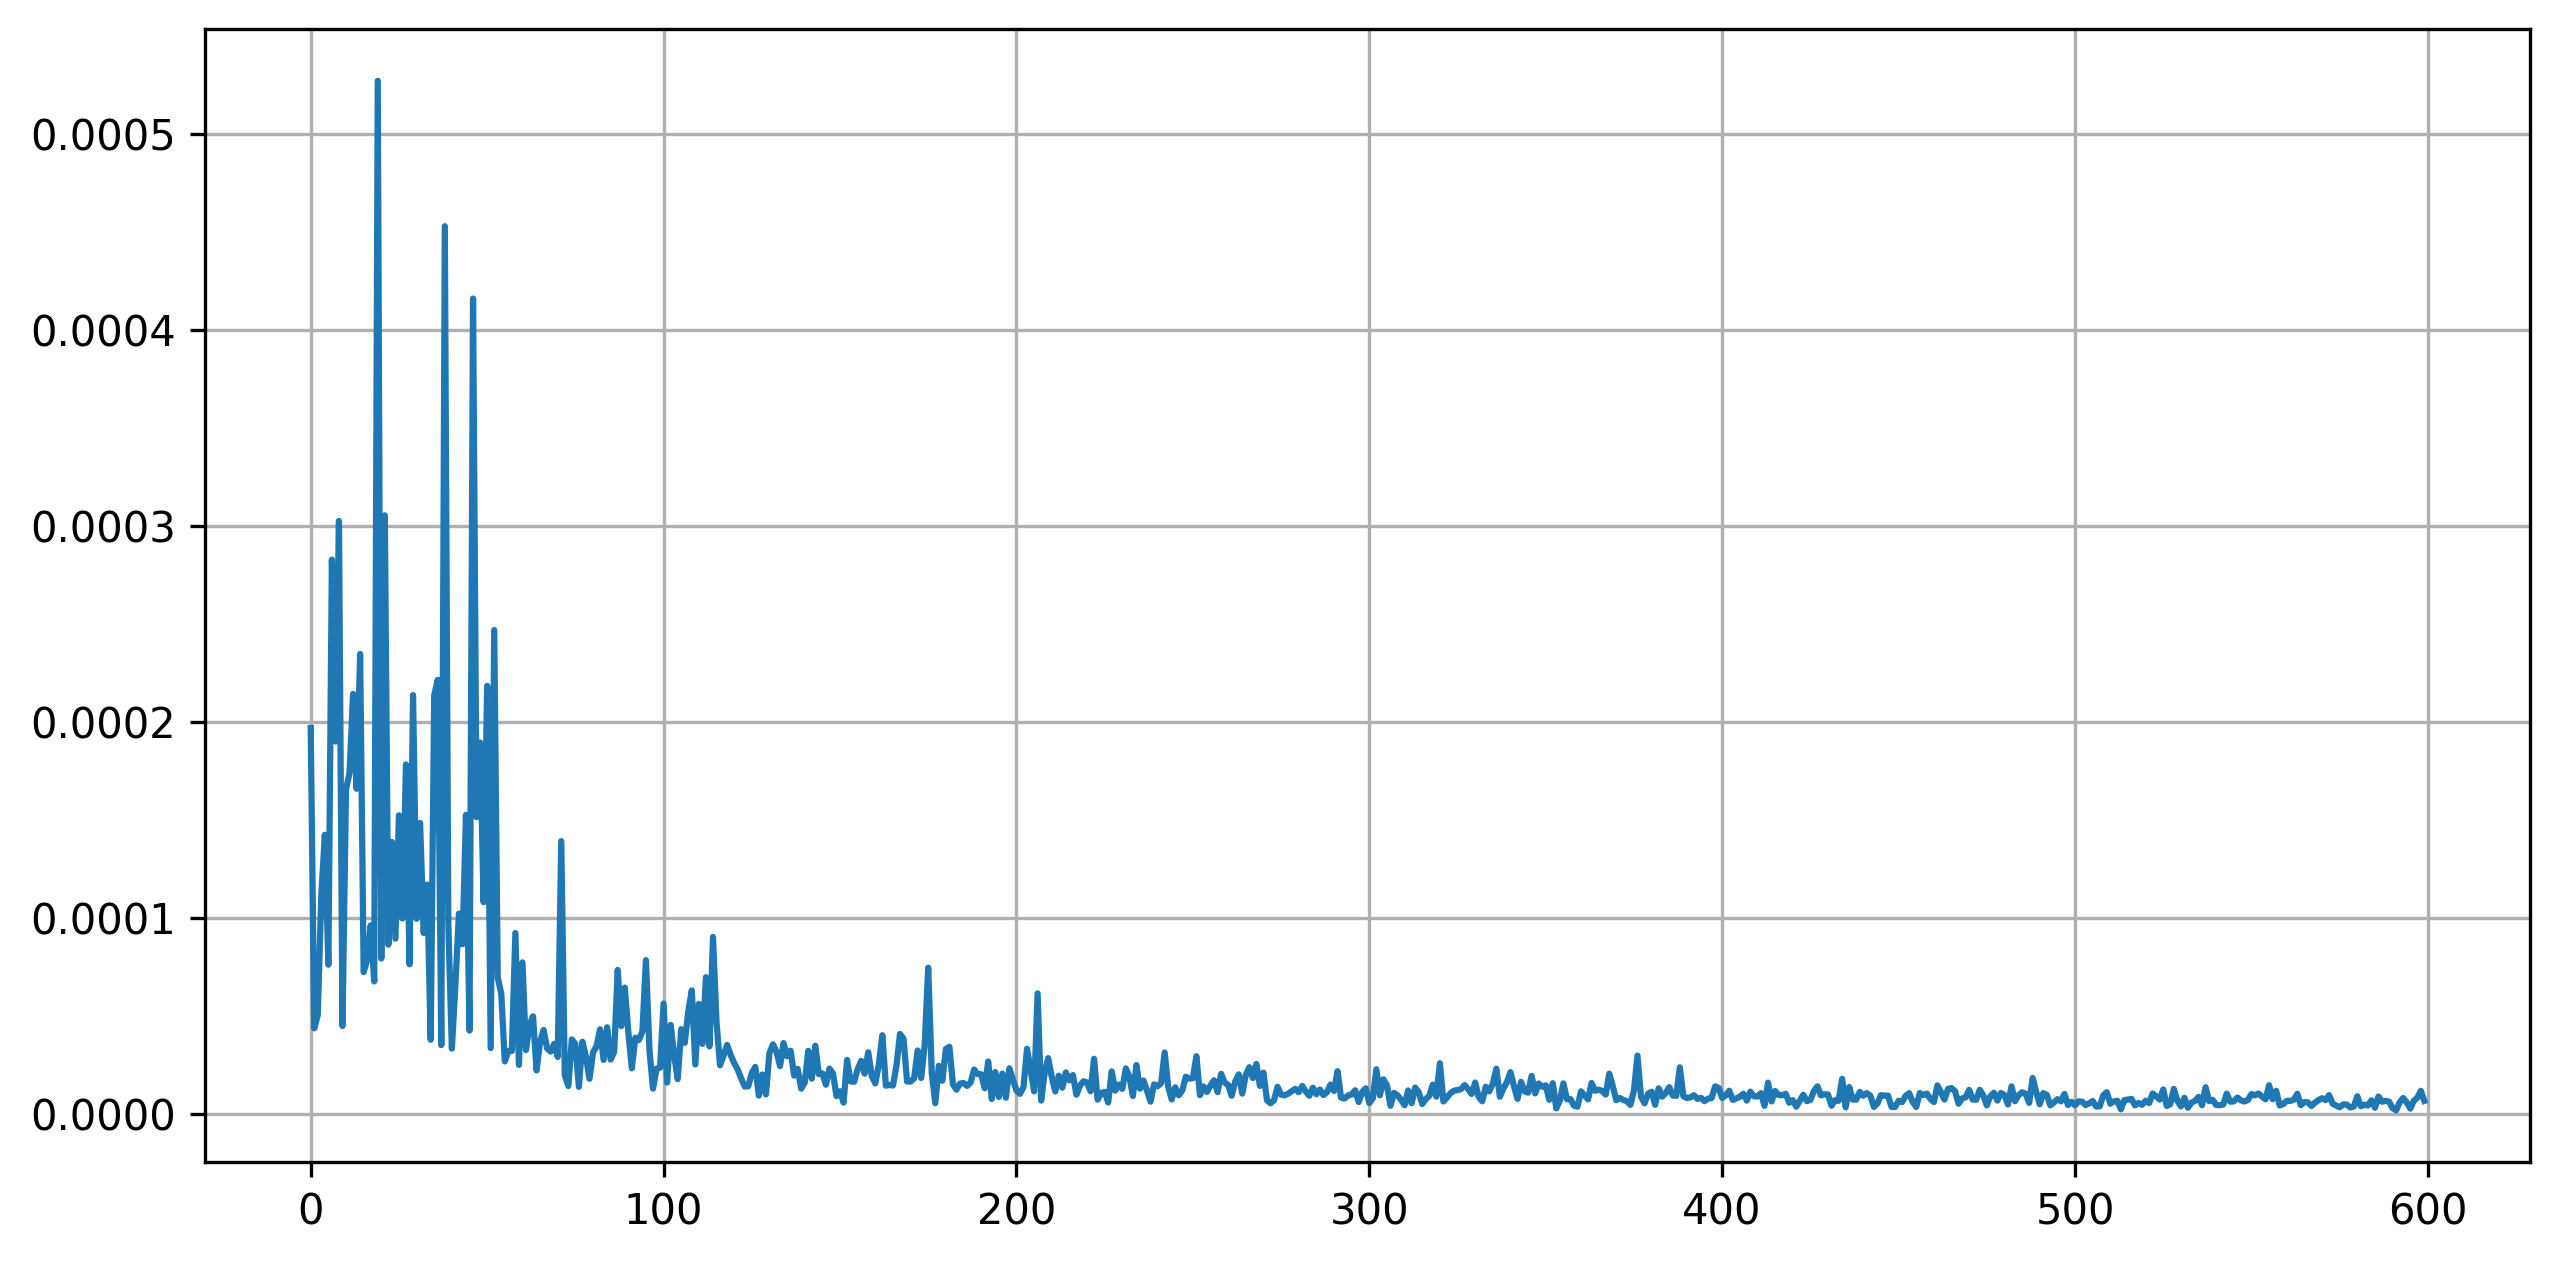

In [46]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(Loss_hist)
plt.grid()